In [1]:
import random 
import numpy as np
import pandas as pd

### Perceptron od neuronu różni sie tym że wagi są aktualizowane przez funkcje aktywacji, której nie ma w perceptronie. W perceptronie dane musza być rozdzielne linowo żeby osiągnął zbierzność !!
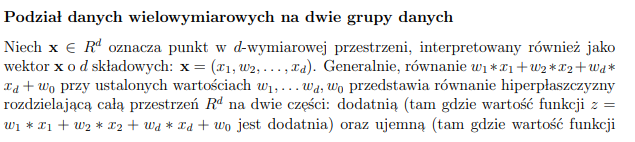
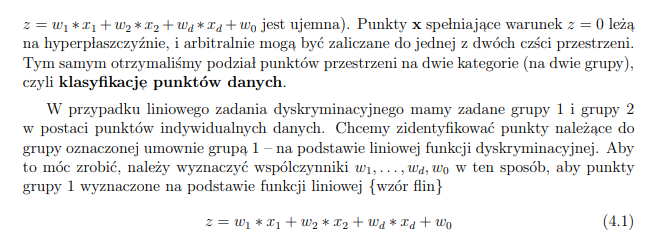

In [24]:
class Perceptron(object):
    # ETA - współczynnik z przedziału 0.0-1.0
    # n_iter - liczba przebiegów po zestawach uczących 
    # randowm_state - genertor losowych wag
    
    # w_ - wagi po dopasowaniu 
    # errors_ - liczba niprawidłowych klasyfikacji w każdej epoce
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X,y):
        #X - zb. uczący [n_ptzykładów, n_cech]
        #y - wartrosci docelowe [n_przykładów]
        rgen = np.random.RandomState(self.random_state)# generowanie liczb losowych
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) # generowanie rozkładu normalnego 
        # odchyl std 0,01, 
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
    def net_input(self, X):
        # tylko całkowite pobudzenia
        return np.dot(X, self.w_[1:]+self.w_[0])# oblicza iloczyn skakarny wektorów
    
    def predict(self, X):
        # zwraca etykiete klasy po oblczeniu funcji skoku
        return np.where(self.net_input(X) >= 0.0, 1, -1)# jak istrukcja if zwraca co jest w nawiasie

In [25]:
# import datasetu 
import os

In [26]:
s = os.path.join("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
print(s)

https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [27]:
df = pd.read_csv(s, header=None, encoding="utf-8")
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [28]:
import matplotlib.pyplot as plt
#  WEKTOR Y
# 50 - etykiet (1-versicolor)
# 50 - etykiet(-1 setosa)

# MACIERZ X
# 1 kolumna - dł. działki
# 2 - kolumna - dł. płatka 


In [33]:
y = df.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [34]:
X = df.iloc[0:100, [0,2]].values

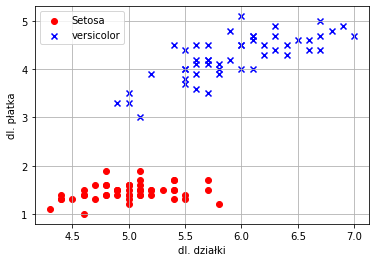

In [35]:
plt.scatter(X[:50, 0], X[:50,1],
           color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1],
           color="blue", marker="x", label="versicolor")
plt.xlabel("dl. działki")
plt.ylabel("dl. płatka")
plt.grid()
plt.legend()
plt.show()

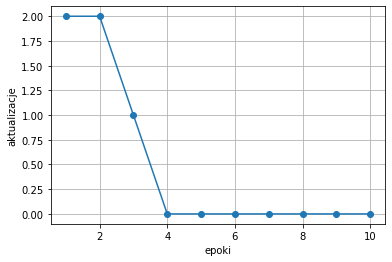

In [36]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker="o")
plt.xlabel("epoki")
plt.ylabel("aktualizacje")
plt.grid()

plt.show()
## zbierzność perceptronu już w 4 epoce 

In [37]:
# funkcja do wizualizacji granic decyzyjnych 
from matplotlib.colors import ListedColormap

In [58]:
def plot_decision_regions(X,y, classifier, resolution=0.02):
    markers = ("s","x","o","^","v")
    colors = ("red","blue","gray","cyan", "yellow")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # reysuje wykres powierzchni decyzyjnej 
    x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), # zwraca macierze z wektorami 
                          np.arange(x2_min, x2_max, resolution)) # wspołrzędnych
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max()) # limity osi
    plt.ylim(xx2.min(), xx2.max()) 
    
    # rysuje wykres przykładów 
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],
                   alpha=0.8,
                   marker=markers[idx], label=cl,
                   edgecolors="black")   

C:\Users\Grzegorz Mróz\AppData\Local\Temp\ipykernel_16956\1192515574.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y== cl, 0], y=X[y==cl, 1],


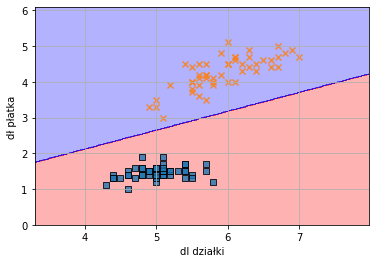

In [60]:
plot_decision_regions(X,y, classifier=ppn)
plt.xlabel("dl działki")
plt.ylabel("dł płatka")
plt.grid()
plt.show()

### Neuron liniwoy (z f. aktywacji liniową, która porównuje rzeczywiste etykiety z wartościami funkcji liniowej )

####  - przy neuronie trzeba zdefiniować f. kosztu czyli sume odległosci kwadratów między etykietami rzeczywistymi a watrościmi funkcji aktywacji 
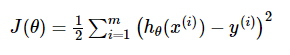
#### - dzięki f. liniowej można zastoswać różniczkowanie czyli gradient prosty 
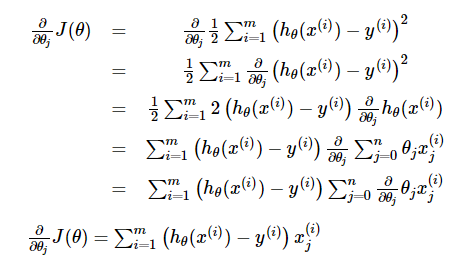

##### zmiania wagi :   w = w + delta w   , delta w = - n*gradient J(0) gdzie (-n) - learning rate

#####     wagi są aktualizowe po obliczeniu wsztkich pochodnych cząstowych daltego gradient ma tz. batch size

In [ ]:
# modyfikacja funkcji fi
